In [125]:
# Shadia's blank canvas

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import gmaps
from scipy.stats import linregress
import scipy.stats as st
from pprint import pprint

covid_clean_CA_TX = "../Resources/covid_clean_CA_TX.csv"
CA_county_landsize = "../Resources/CA_county_landsize.csv"
TX_county_landsize = "../Resources/TX_county_landsize.csv"


In [126]:
covid_clean_CA_TX_df = pd.read_csv(covid_clean_CA_TX, encoding="ISO-8859-1")
covid_clean_CA_TX_df.head()

,State,countyFIPS,County Name,population,stateFIPS,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,...,10/21/2020,10/22/2020,10/23/2020,10/24/2020,10/25/2020,10/26/2020,10/27/2020,10/28/2020,10/29/2020,10/30/2020
0,CA,6000,Grand Princess Cruise Ship,0,6,0,0,0,0,0,...,21,21,21,21,21,21,21,21,21,21
1,CA,6001,Alameda County,1671329,6,0,0,0,0,0,...,22932,23001,23133,23215,23312,23391,23391,23576,23636,23775
2,CA,6003,Alpine County,1129,6,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
3,CA,6005,Amador County,39752,6,0,0,0,0,0,...,276,287,291,291,291,299,301,302,308,311
4,CA,6007,Butte County,219186,6,0,0,0,0,0,...,3018,3030,3047,3047,3047,3073,3073,3113,3127,3144


In [127]:
covid_clean_CA_df = covid_clean_CA_TX_df.loc[covid_clean_CA_TX_df["State"]=="CA",:]
covid_clean_CA_df.head()

,State,countyFIPS,County Name,population,stateFIPS,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,...,10/21/2020,10/22/2020,10/23/2020,10/24/2020,10/25/2020,10/26/2020,10/27/2020,10/28/2020,10/29/2020,10/30/2020
0,CA,6000,Grand Princess Cruise Ship,0,6,0,0,0,0,0,...,21,21,21,21,21,21,21,21,21,21
1,CA,6001,Alameda County,1671329,6,0,0,0,0,0,...,22932,23001,23133,23215,23312,23391,23391,23576,23636,23775
2,CA,6003,Alpine County,1129,6,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
3,CA,6005,Amador County,39752,6,0,0,0,0,0,...,276,287,291,291,291,299,301,302,308,311
4,CA,6007,Butte County,219186,6,0,0,0,0,0,...,3018,3030,3047,3047,3047,3073,3073,3113,3127,3144


In [128]:
covid_clean_TX_df = covid_clean_CA_TX_df.loc[covid_clean_CA_TX_df["State"]=="TX",:]
covid_clean_TX_df.head()

,State,countyFIPS,County Name,population,stateFIPS,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,...,10/21/2020,10/22/2020,10/23/2020,10/24/2020,10/25/2020,10/26/2020,10/27/2020,10/28/2020,10/29/2020,10/30/2020
59,TX,48001,Anderson County,57735,48,0,0,0,0,0,...,2922,2934,2935,2941,2941,2946,2949,2961,2970,2970
60,TX,48003,Andrews County,18705,48,0,0,0,0,0,...,567,567,567,584,584,584,628,628,655,667
61,TX,48005,Angelina County,86715,48,0,0,0,0,0,...,2277,2277,2277,2277,2277,2277,2304,2304,2317,2317
62,TX,48007,Aransas County,23510,48,0,0,0,0,0,...,340,340,345,346,348,348,349,350,350,351
63,TX,48009,Archer County,8553,48,0,0,0,0,0,...,133,133,136,137,137,137,142,154,160,161


In [129]:
CA_county_landsize_df = pd.read_csv(CA_county_landsize, encoding="ISO-8859-1")
CA_county_landsize_df = CA_county_landsize_df.rename(columns={"ï»¿Land Area": "Land Area"})
CA_county_landsize_df.head()

,Land Area,County Name
0,20056.92,San Bernardino County
1,10180.87,Inyo County
2,8131.91,Kern County
3,7206.47,Riverside County
4,6277.88,Siskiyou County


In [130]:
TX_county_landsize_df = pd.read_csv(TX_county_landsize, encoding="ISO-8859-1")
TX_county_landsize_df = TX_county_landsize_df.rename(columns={"ï»¿Land Area": "Land Area"})
TX_county_landsize_df.head()

,Land Area,County Name
0,1062.6,Anderson County
1,1500.7,Andrews County
2,797.8,Angelina County
3,252.1,Aransas County
4,903.3,Archer County


In [131]:
final_TX_pd = pd.merge(covid_clean_TX_df, TX_county_landsize_df, how="left", on=["County Name"])
final_TX_pd = final_TX_pd.dropna()
final_TX_pd["Population Density"]=""
final_TX_pd.head()

,State,countyFIPS,County Name,population,stateFIPS,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,...,10/23/2020,10/24/2020,10/25/2020,10/26/2020,10/27/2020,10/28/2020,10/29/2020,10/30/2020,Land Area,Population Density
0,TX,48001,Anderson County,57735,48,0,0,0,0,0,...,2935,2941,2941,2946,2949,2961,2970,2970,1062.6,
1,TX,48003,Andrews County,18705,48,0,0,0,0,0,...,567,584,584,584,628,628,655,667,1500.7,
2,TX,48005,Angelina County,86715,48,0,0,0,0,0,...,2277,2277,2277,2277,2304,2304,2317,2317,797.8,
3,TX,48007,Aransas County,23510,48,0,0,0,0,0,...,345,346,348,348,349,350,350,351,252.1,
4,TX,48009,Archer County,8553,48,0,0,0,0,0,...,136,137,137,137,142,154,160,161,903.3,


In [132]:
final_CA_pd = pd.merge(covid_clean_CA_df, CA_county_landsize_df, how="left", on=["County Name"])
final_CA_pd = final_CA_pd.dropna()
# Calculating populatin density
final_CA_pd["Population Density"]= ""
final_CA_pd["Population Density"]= final_CA_pd['population']/final_CA_pd['Land Area']
# Calculating Covid Per Capita
final_CA_pd["Covid Per Capita"]= ""
final_CA_pd["Covid Per Capita"]= final_CA_pd['10/30/2020']/final_CA_pd['population']
final_CA_pd.sort_values("Population Density", ascending=False)
final_CA_pd.head()

,State,countyFIPS,County Name,population,stateFIPS,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,...,10/24/2020,10/25/2020,10/26/2020,10/27/2020,10/28/2020,10/29/2020,10/30/2020,Land Area,Population Density,Covid Per Capita
1,CA,6001,Alameda County,1671329,6,0,0,0,0,0,...,23215,23312,23391,23391,23576,23636,23775,739.02,2261.547725,0.014225
2,CA,6003,Alpine County,1129,6,0,0,0,0,0,...,3,3,3,3,3,3,3,738.33,1.529127,0.002657
3,CA,6005,Amador County,39752,6,0,0,0,0,0,...,291,291,299,301,302,308,311,594.58,66.857277,0.007824
4,CA,6007,Butte County,219186,6,0,0,0,0,0,...,3047,3047,3073,3073,3113,3127,3144,1636.46,133.939112,0.014344
5,CA,6009,Calaveras County,45905,6,0,0,0,0,0,...,342,342,342,342,347,347,354,1020.01,45.004461,0.007712


In [133]:
final_TX_pd = pd.merge(covid_clean_TX_df, TX_county_landsize_df, how="left", on=["County Name"])
final_TX_pd = final_TX_pd.dropna()
final_TX_pd["Population Density"]= ""
final_TX_pd["Population Density"]= final_TX_pd['population']/final_TX_pd['Land Area']
# Calculating Covid Per Capita
final_TX_pd["Covid Per Capita"]= ""
final_TX_pd["Covid Per Capita"]= final_TX_pd['10/30/2020']/final_TX_pd['population']
final_TX_pd.sort_values("Population Density", ascending=False)
final_TX_pd.head()

,State,countyFIPS,County Name,population,stateFIPS,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,...,10/24/2020,10/25/2020,10/26/2020,10/27/2020,10/28/2020,10/29/2020,10/30/2020,Land Area,Population Density,Covid Per Capita
0,TX,48001,Anderson County,57735,48,0,0,0,0,0,...,2941,2941,2946,2949,2961,2970,2970,1062.6,54.333710,0.051442
1,TX,48003,Andrews County,18705,48,0,0,0,0,0,...,584,584,584,628,628,655,667,1500.7,12.464183,0.035659
2,TX,48005,Angelina County,86715,48,0,0,0,0,0,...,2277,2277,2277,2304,2304,2317,2317,797.8,108.692655,0.026720
3,TX,48007,Aransas County,23510,48,0,0,0,0,0,...,346,348,348,349,350,350,351,252.1,93.256644,0.014930
4,TX,48009,Archer County,8553,48,0,0,0,0,0,...,137,137,137,142,154,160,161,903.3,9.468615,0.018824


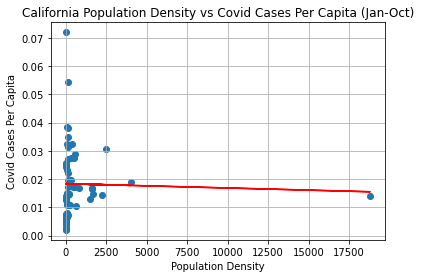

-0.029944366890738257


<Figure size 432x288 with 0 Axes>

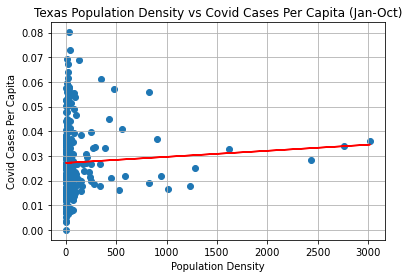

0.05901251679703986


<Figure size 432x288 with 0 Axes>

In [134]:
x_values = final_CA_pd["Population Density"]
y_values = final_CA_pd["Covid Per Capita"]
plt.figure()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title("California Population Density vs Covid Cases Per Capita (Jan-Oct)")
plt.xlabel("Population Density")
plt.ylabel("Covid Cases Per Capita")
plt.grid(True)
plt.show()
plt.savefig("../Images/CAPop_Density_vs_Covid_Cases.png")
print(rvalue)



x_values = final_TX_pd["Population Density"]
y_values = final_TX_pd["Covid Per Capita"]
plt.figure()
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title("Texas Population Density vs Covid Cases Per Capita (Jan-Oct)")
plt.xlabel("Population Density")
plt.ylabel("Covid Cases Per Capita")
plt.grid(True)
plt.show()
plt.savefig("../Images/TXPop_Density_vs_Covid_Cases.png")
print(rvalue)

In [135]:
bins = [100, 5000, 25000, 50000, 250000, 500000, 750000, 1250000]
population_sizes = ["100-4999","5000-24999","25000-49999","50000-249999", "250000-499999", "500000-749999","750000-1250000"]

final_CA_pd["Population Bins"] = pd.cut(final_CA_pd["population"], bins, labels=population_sizes, include_lowest=True)
final_CA_bins_pd = final_CA_pd.dropna()
final_CA_bins_pd = final_CA_bins_pd[["Population Bins", "Covid Per Capita"]] 
final_CA_bins_pd = final_CA_bins_pd.groupby("Population Bins").sum()
final_CA_bins_pd = final_CA_bins_pd.rename(columns={"Covid Per Capita": "CA Covid Per Capita"})
final_CA_bins_pd

,CA Covid Per Capita
Population Bins,
100-4999,0.004654
5000-24999,0.068902
25000-49999,0.076726
50000-249999,0.335645
250000-499999,0.223152
500000-749999,0.032456
750000-1250000,0.160814


In [136]:
bins = [100, 5000, 25000, 50000, 250000, 500000, 750000, 1250000]
population_sizes = ["100-4999","5000-24999","25000-49999","50000-249999", "250000-499999", "500000-749999","750000-1250000"]

final_CA_pd["Population Bins"] = pd.cut(final_CA_pd["population"], bins, labels=population_sizes, include_lowest=True)
final_CA_bins_den_pd = final_CA_pd.dropna()
final_CA_bins_den_pd = final_CA_bins_den_pd[["Population Bins", "Population Density"]] 
final_CA_bins_den_pd = final_CA_bins_den_pd.groupby("Population Bins").sum()
final_CA_bins_den_pd = final_CA_bins_den_pd.rename(columns={"Population Density": "CA Population Density"})
final_CA_bins_den_pd

,CA Population Density
Population Bins,
100-4999,4.681632
5000-24999,50.594883
25000-49999,174.774280
50000-249999,1518.431810
250000-499999,2874.240164
500000-749999,368.376337
750000-1250000,23414.309330


In [137]:
bins = [100, 5000, 25000, 50000, 250000, 500000, 750000, 1250000]
population_sizes = ["100-4999","5000-24999","25000-49999","50000-249999", "250000-499999", "500000-749999","750000-1250000"]

final_TX_pd["Population Bins"] = pd.cut(final_TX_pd["population"], bins, labels=population_sizes, include_lowest=True)
final_TX_bins_pd = final_TX_pd.dropna()
final_TX_bins_pd = final_TX_bins_pd[["Population Bins", "Covid Per Capita"]]
final_TX_bins_pd = final_TX_bins_pd.groupby("Population Bins").sum()
final_TX_bins_pd = final_TX_bins_pd.rename(columns={"Covid Per Capita": "TX Covid Per Capita"})
final_TX_bins_pd

,TX Covid Per Capita
Population Bins,
100-4999,1.071201
5000-24999,2.936157
25000-49999,0.935296
50000-249999,1.309095
250000-499999,0.380029
500000-749999,0.038107
750000-1250000,0.153234


In [138]:
bins = [100, 5000, 25000, 50000, 250000, 500000, 750000, 1250000]
population_sizes = ["100-4999","5000-24999","25000-49999","50000-249999", "250000-499999", "500000-749999","750000-1250000"]

final_TX_pd["Population Bins"] = pd.cut(final_CA_pd["population"], bins, labels=population_sizes, include_lowest=True)
final_TX_bins_den_pd = final_TX_pd.dropna()
final_TX_bins_den_pd = final_TX_bins_den_pd[["Population Bins", "Population Density"]] 
final_TX_bins_den_pd = final_TX_bins_den_pd.groupby("Population Bins").sum()
final_TX_bins_den_pd = final_TX_bins_den_pd.rename(columns={"Population Density": "TX Population Density"})
final_TX_bins_den_pd

,TX Population Density
Population Bins,
100-4999,123.232002
5000-24999,1748.243939
25000-49999,215.974079
50000-249999,1287.243175
250000-499999,1564.468728
500000-749999,1.552298
750000-1250000,3201.854502


In [139]:
final_CA_TX_bins_den = pd.concat([final_TX_bins_den_pd,final_CA_bins_den_pd], axis=1)
final_CA_TX_bins_den

,TX Population Density,CA Population Density
Population Bins,,
100-4999,123.232002,4.681632
5000-24999,1748.243939,50.594883
25000-49999,215.974079,174.774280
50000-249999,1287.243175,1518.431810
250000-499999,1564.468728,2874.240164
500000-749999,1.552298,368.376337
750000-1250000,3201.854502,23414.309330


In [140]:
final_CA_TX_bins = pd.concat([final_TX_bins_pd,final_CA_bins_pd], axis=1)
final_CA_TX_bins

,TX Covid Per Capita,CA Covid Per Capita
Population Bins,,
100-4999,1.071201,0.004654
5000-24999,2.936157,0.068902
25000-49999,0.935296,0.076726
50000-249999,1.309095,0.335645
250000-499999,0.380029,0.223152
500000-749999,0.038107,0.032456
750000-1250000,0.153234,0.160814


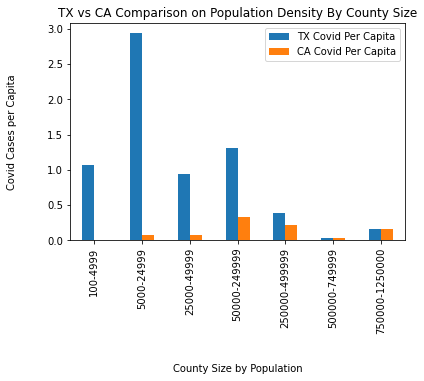

In [141]:
final_CA_TX_bins = final_CA_TX_bins.plot(kind="bar")
final_CA_TX_bins.set_ylabel("Covid Cases per Capita", labelpad=30)
final_CA_TX_bins.set_xlabel("County Size by Population", labelpad=30)
final_CA_TX_bins.set_title("TX vs CA Comparison on Population Density By County Size")
plt.savefig("../Images/TX_CA_Covid_per_Capita.png")

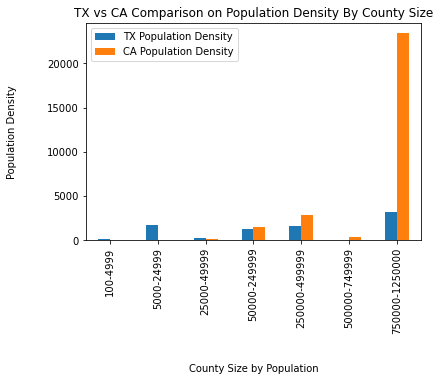

In [124]:
final_CA_TX_bins_den = final_CA_TX_bins_den.plot(kind="bar")
final_CA_TX_bins_den.set_ylabel("Population Density", labelpad=30)
final_CA_TX_bins_den.set_xlabel("County Size by Population", labelpad=30)
final_CA_TX_bins_den.set_title("TX vs CA Comparison on Population Density By County Size")
plt.savefig("../Images/TX_CA_Pop_Density_png")